# Homework 1 machine learning

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 1. Load the dataset and plot figures similar to the ones above.

In [2]:
# import the data 
data = pd.read_csv("year-sunspots-republicans.csv")

In [3]:
data.head()

,Year,Sunspot_Count,Republican_Count
0,1960,112.3,36
1,1962,37.6,34
2,1964,10.2,32
3,1966,47.0,36
4,1968,105.9,43


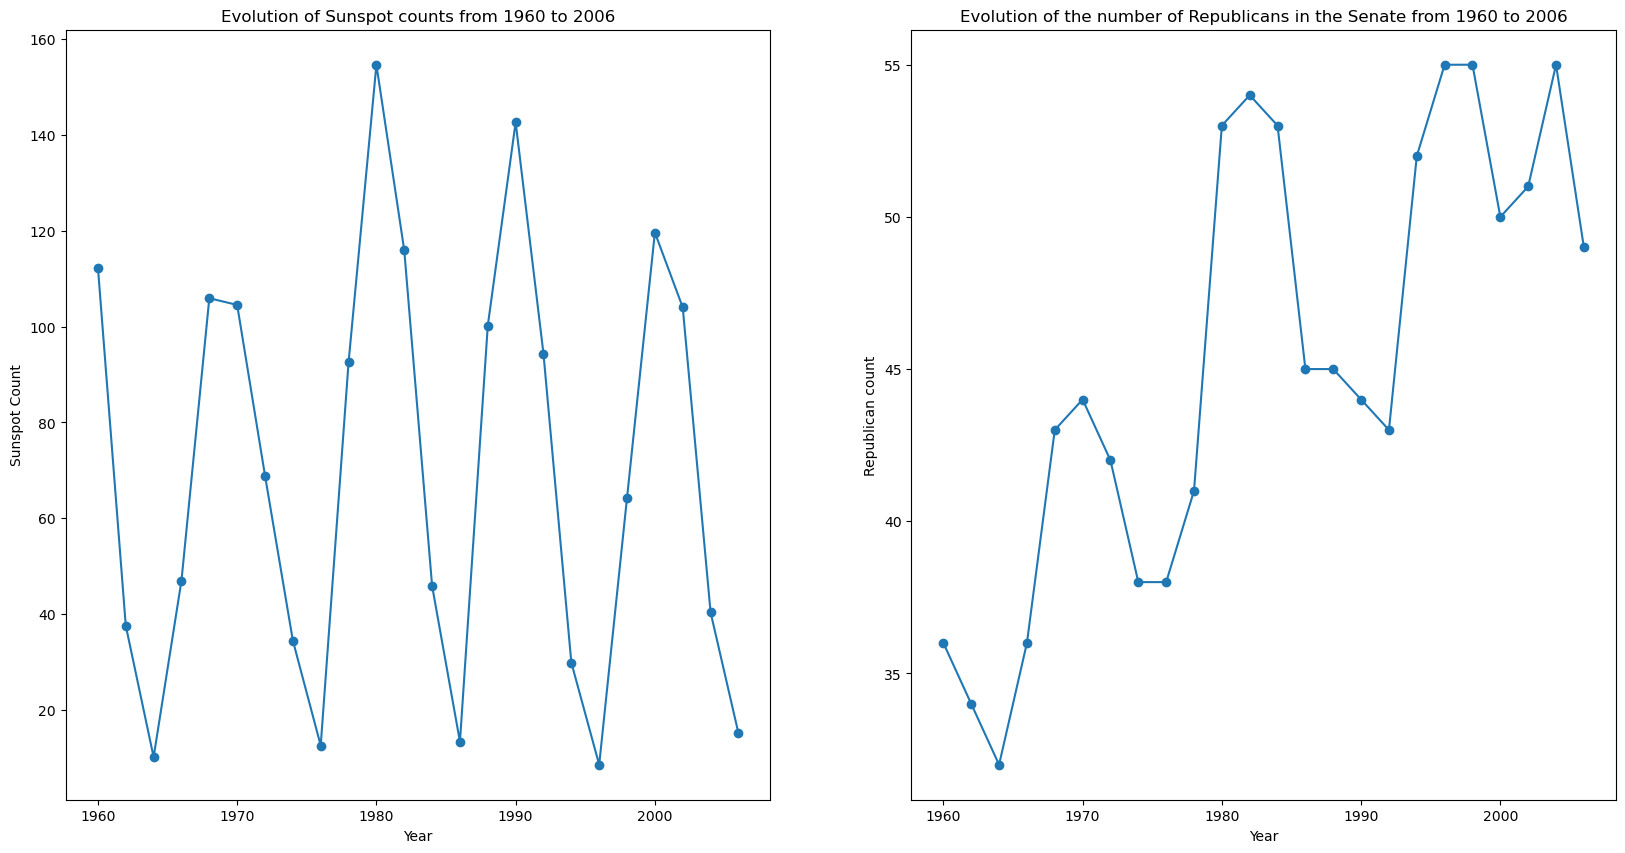

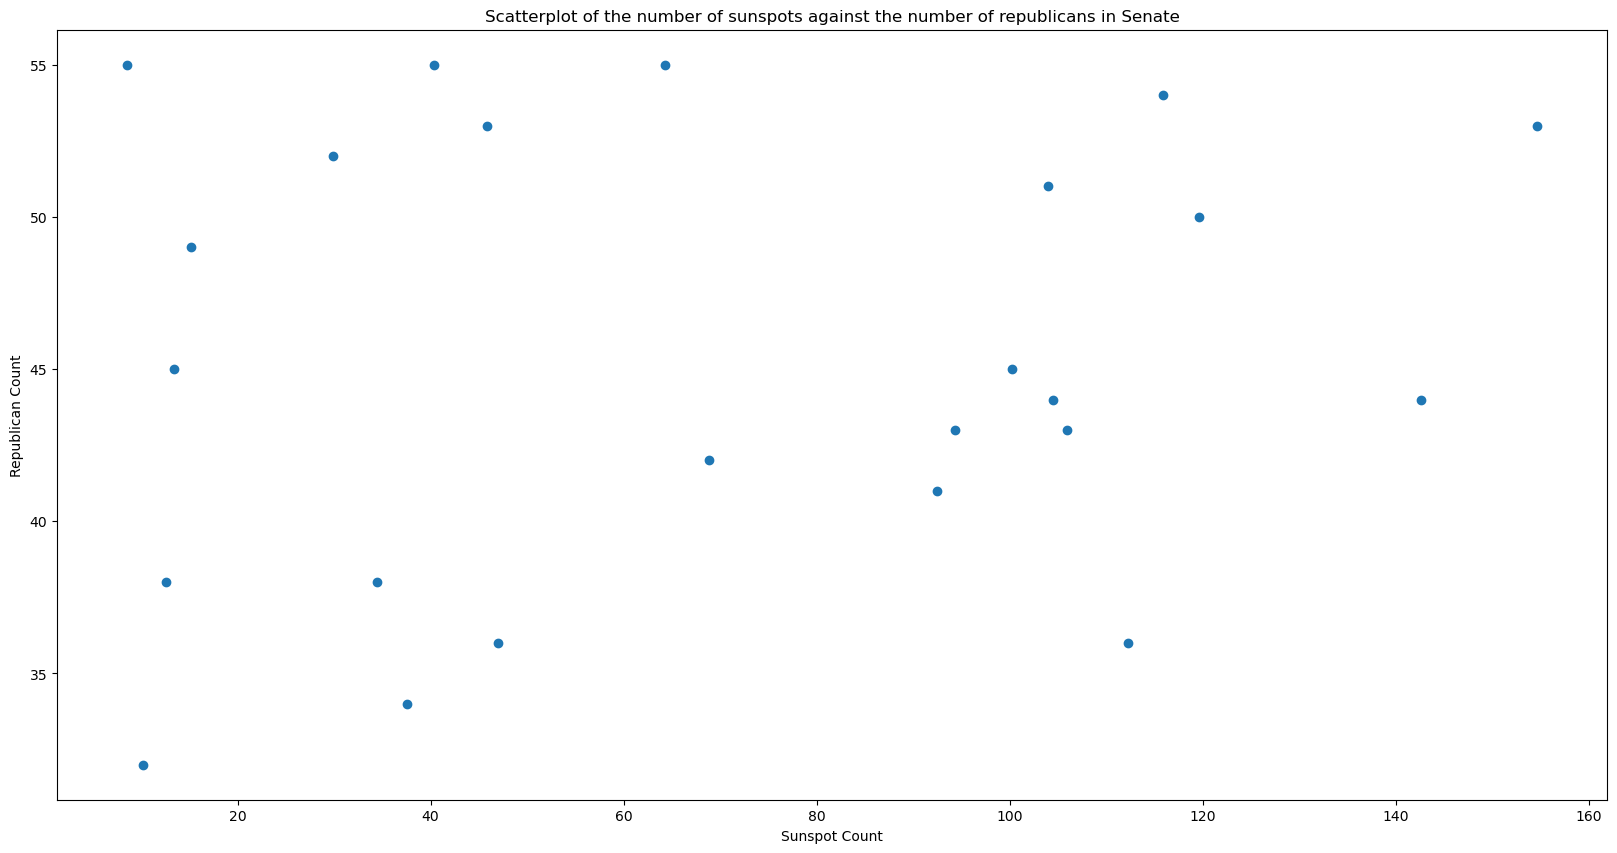

In [4]:
fig, ax  = plt.subplots(1,2, figsize = (20,10))

# plot Year vs Sunspost Count

ax[0].plot(data["Year"], data["Sunspot_Count"], marker = "o")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sunspot Count")
ax[0].set_title("Evolution of Sunspot counts from 1960 to 2006")

# plot Year vs Republican Count 

ax[1].plot(data["Year"], data["Republican_Count"], marker = "o")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Republican count")
ax[1].set_title("Evolution of the number of Republicans in the Senate from 1960 to 2006")

plt.show()

# plot Sunspot Count vs Republican Count 

fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(data["Sunspot_Count"], data["Republican_Count"])
ax.set_xlabel("Sunspot Count")
ax.set_ylabel("Republican Count")
ax.set_title("Scatterplot of the number of sunspots against the number of republicans in Senate")

plt.show()

## 2. Implement these procedures to obtain new features. In the sequel, we only use these new features

In [5]:
# scaling the year 

data["Year"] = (data["Year"] - 1960)/40

In [6]:
data.head()

,Year,Sunspot_Count,Republican_Count
0,0.00,112.3,36
1,0.05,37.6,34
2,0.10,10.2,32
3,0.15,47.0,36
4,0.20,105.9,43


# 3. Plot the data and regression lines for each of the following sets of basis functions, and include the generated plot as an image in your submission. You will therefore make 4 total plots:

In [7]:
# create the different basis 


def polynomial_basis(x):
    """
    Create an array of polynomial features $\phi_j(x)=x^j$ for j=0,...,5.
    
    Parameters:
        - x (np.array): of size n.

    Returns:
        - features (np.array): of shape (n, 6).
    """
    power = np.arange(0, 6) 
    x = np.resize(x, (6, x.shape[0]))
    features = (x.T)**power
    
    return features

def basis_b(x):
    """
    Create the Gaussian basis.
    
    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 11).
    """
    
    n = x.shape[0]
    
    mu_j = np.arange(0,51,5)
    x = np.resize(x, (11, x.shape[0]))
    
    features = np.exp((-(40*x.T-mu_j)**2)/25)
    features = np.hstack((np.ones((n,1)), features))
                      
    return features



def basis_c(x):
    """
    Create the cos-sin basis.
    
    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 6).
    """
    
    n = x.shape[0]
    
    j = np.arange(1, 6) 
    x = np.resize(x, (5, x.shape[0]))
    
    features = np.cos((x.T)/j)
    features = np.hstack((np.ones((n,1)), features))

    return features


def basis_d(x):
    """
    Create the cos-sin basis.
    
    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 26).
    """
    n = x.shape[0]
    
    j = np.arange(1, 26) 
    x = np.resize(x, (25, x.shape[0]))
    
    features = np.cos((x.T)/j)
    features = np.hstack((np.ones((n,1)), features))
    
    return features


In [8]:
def fit_least_square(X, y):
    """
    Compute the parameters of the linear regression using the features.
    
    Parameters:
        - X (np.array): features.
        - y (np.array): target values.
    Returns:
        - w_star (np.array): parameters of the linear regression.
        - y_hat (np.array): predictions of the linear model.
    """
    w_star = np.linalg.solve(X.T@X, (X.T)@y)
    y_hat = X@w_star
    
    return w_star, y_hat


In [9]:
def compute_averaged_squared_error(X, y, w):
    """
    Given the matrix of features, the parameters of the linear regression and the vector of targets,
    returns the squared distance between the predictions and the ground truth.
    
    Parameters:
        - X (np.array): features.
        - y (np.array): target values, of shape (n,).
        - w (np.array): parameters of the linear regression.
    Returns:
        - error (float): the averaged squared distance between the predictions and the ground truth.
    """
    error = (np.linalg.norm((y - X@w)))**2
    n = y.shape[0]
    return error/n

In [10]:
def do_regression(x, y, basis_function):
    
    """
    plot the data and regression lines for the given basis function and print out the training error
    
    Parameters:
        - x (np.array): input data.
        - y (np.array): target values.
        - basis_function (function): basis function to be used
   
    """
    
    # create the basis 
    X = eval(basis_function + "(x)")

    
    w, y_hat = fit_least_square(X,y)
    error = compute_averaged_squared_error(X, y, w)
    
    plt.plot(x, y, 'b.', label='data')
    plt.plot(x, y_hat, 'r', label='Regression')
    plt.title('Least Squares Regression -'+ basis_function)
    plt.legend()
    plt.show()

    print(f'Train error: {error: .3f}')
   

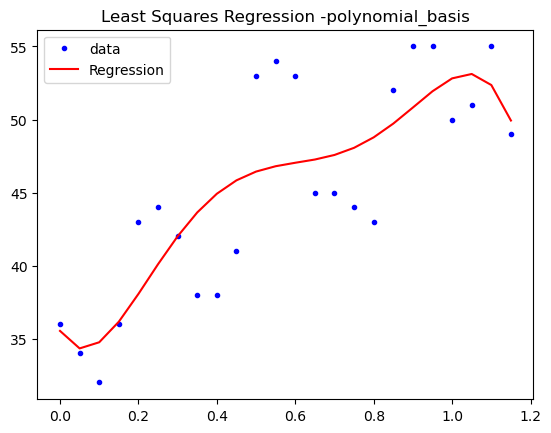

Train error:  16.458


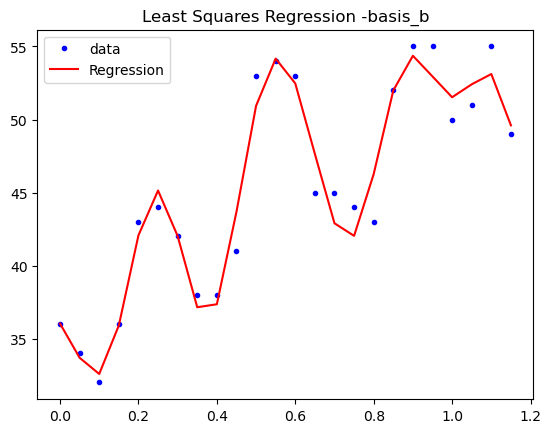

Train error:  2.261


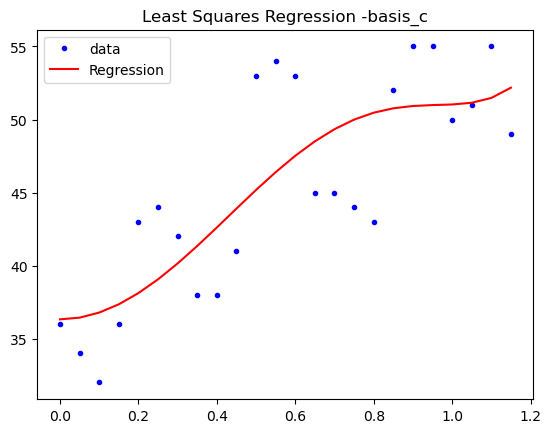

Train error:  18.872


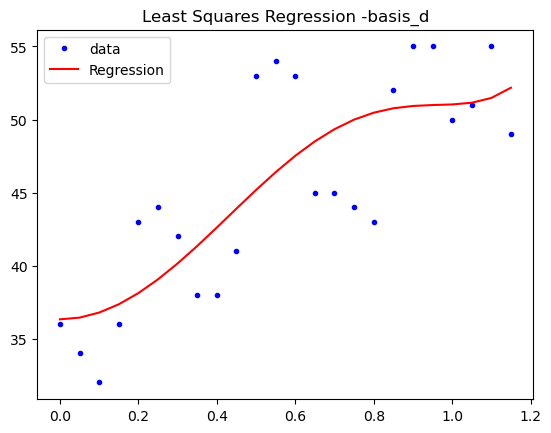

Train error:  18.871


In [11]:
do_regression(data["Year"], data["Republican_Count"], "polynomial_basis")
do_regression(data["Year"], data["Republican_Count"], "basis_b")
do_regression(data["Year"], data["Republican_Count"], "basis_c")
do_regression(data["Year"], data["Republican_Count"], "basis_d")

### 5. Repeat the same exact process as above but for Number of Sunspots (x-axis) v. Number of Republicans in the Senate (y-axis). Here, to avoid numerical instability with numbers in the Sunspot Count column, we will also scale the data first by dividing all “sunspot count”inputs by 20. In addition, only use data from before 1985, and only use basis functions (a),(c), and (d) – ignore basis (b). You will therefore make 3 total plots. For each plot make sure to also include the train error

In [12]:
# preparing data 

data["Sunspot_Count"] = data["Sunspot_Count"]/20
data = data[data["Year"]<=(1985-1960)/40]
data

,Year,Sunspot_Count,Republican_Count
0,0.00,5.615,36
1,0.05,1.880,34
2,0.10,0.510,32
3,0.15,2.350,36
4,0.20,5.295,43
5,0.25,5.225,44
6,0.30,3.445,42
7,0.35,1.725,38
8,0.40,0.630,38
9,0.45,4.625,41


In [13]:
# we sort values for plotting issues
data = data.sort_values("Sunspot_Count")

x = data["Sunspot_Count"]
y = data["Republican_Count"]

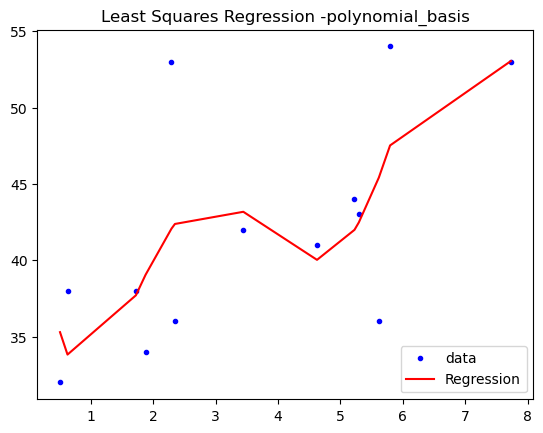

Train error:  27.018


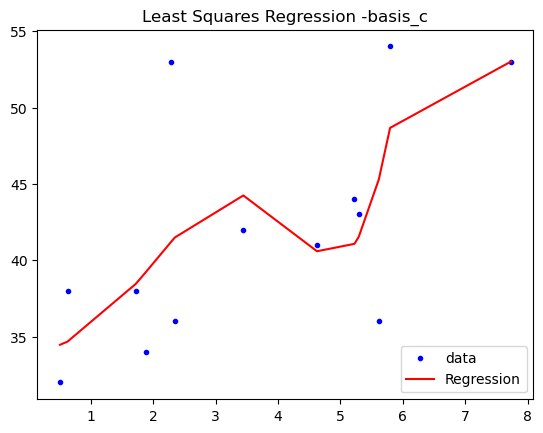

Train error:  26.445


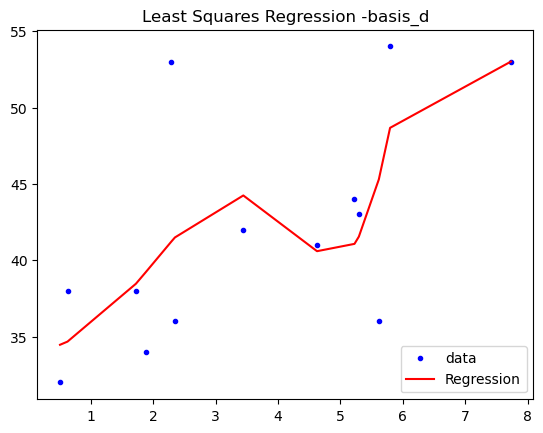

Train error:  26.442


In [14]:
do_regression(x, y, "polynomial_basis")
do_regression(x, y, "basis_c")
do_regression(x, y, "basis_d")

### 6. Which of the three bases (a, c, d) provided the ”best” fit? Choose one, and keep in mind the generalizability of the model

In general, the best model is the model that most accurately capture the true distribution of the data using the smallest possible number of parameters (weights). <br>
We first notice that the model generated by basis c is included in the model generated by basis d. Therefore, we need to ask ourselves if it is relevant to add complexity to model c. Looking at the training error, we note that the added complexity reduces the training error by only 0.003. Hence, adding parameters does not allow us to fit the data better. <br>
More rigorously, looking at $ AIC = 2d - 2\ln(error) $ where $ d $ is the number of parameters:

In [15]:
# AIC for model c
print(f"AIC for model c : {2*6 -2*np.log(26.445):.2f}")

# AIC for model d
print(f"AIC for model d : {2*26 -2*np.log(26.442):.2f}")

AIC for model c : 5.45
AIC for model d : 45.45


Therefore we eliminate model d

We now compare model a and c. <br>
Both model use the same number of parameters. The training error of model a is slightly lower than the one for model c. However, this is mostly due to the behaviour of the regression line for small values of "Number of Sunspots". We see that the regression line for model a follows very closely the points and does not look to generalize well while the regression line for model b for those same points looks to capture the relationship better. Therefore we choose model b. <br>
We conclude by saying we fitted those models on only 10 points and that more data would be needed to be able to make a better decision.

### 7. Given the quality of this fit, do you believe that the number of sunspots controls the number of Republicans in the senate (Yes or No)?

Model c is definitely capturing some possible relationship that might exist between the number of sunspots and the number of Republicans. However, correlation/existence of relationship between two variables does not mean there is casuality. Therefore I would say NO to the question because of the use of the word "control" that to me implies some casuality relation. But I would yes if we mean only relationship between number of sunsposts and number of Republicans.